# Homework Lecture 8

Write a shooting method to calculate the Legendre polynomials with n=5.

\begin{equation}
\frac{d^2 P_n}{d x^2} = \frac{1}{1-x^2}[2x\frac{dP_n}{dx}-n(n+1)P_n],
\end{equation}

The integration domain can be reduced from [-1,1] to [0,1].

We want to integrate
\begin{equation}
y''=\frac{1}{1-x^2}[2xy'-n(n+1)y],
\end{equation}
from 0 to 1.
We will use the initial and boundary conditions
\begin{eqnarray}
y(0) &=& 0\\
y'(0) &=& y'_a\\
\end{eqnarray}

We will vary y'(0) until y(1)=1 with the bisection method.

We have a second order differential equation so we will break it up into two first order differential equations

\begin{eqnarray}
\frac{dy}{dx} &=& v_y,\\
\frac{dv_y}{dx} &=& \frac{1}{1-x^2}[2xy'-n(n+1)y].
\end{eqnarray}


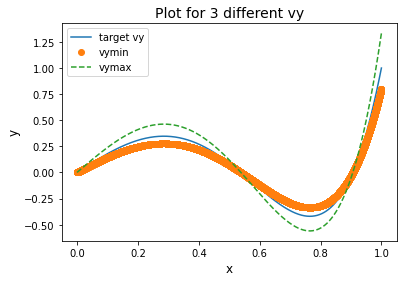

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xend=1.

################################################
#To make a plot for vy=1.875=target vy
################################################

vy=1.8750    
h=1.e-4
y=[0.,vy]    #y[0]=y, y[1]=vy
targety=1.
x=0.

def f(t, y):
    '''
    Legendre polynomial function
    '''
    f=np.zeros(2)
    n=5
    f[0]=y[1]    #dy/dx
    f[1]=(1/(1-x*x))*(2*x*y[1]-n*(n+1)*y[0])
    return f

def rk4(t, h, y, n):
    '''
    Runge-Kutta method for integration
    '''
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

xp=[x]
yp=[y[0]]
while(x<xend):
    '''
    loop to get our x points and y points on the interval 0 to 1
    '''
    if((x+h)>xend):
        h=xend-x
    y = rk4(x,h,y,2)
    xp=np.append(xp,x)
    yp=np.append(yp,y[0])
    x= x+h
plt.plot(xp,yp, label='target vy')

################################################
#To make a plot for vy=1.500 = vymin
################################################

def f2(t, y):
    '''
    Legendre polynomial function
    '''
    f2=np.zeros(2)
    n=5
    f2[0]=y[1]    #dy/dx
    f2[1]=(1/(1-x2*x2))*(2*x2*y[1]-n*(n+1)*y[0])
    return f2

def rk4(t, h, y, n):
    '''
    Runge-Kutta method for integration
    '''
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f2(t,y)
    k2=h*f2(t+0.5*h,y+0.5*k1)
    k3=h*f2(t+0.5*h,y+0.5*k2)
    k4=h*f2(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

h2=1.e-4
x2=0.
vy2=1.500
y2=[0.,vy2]
xp2=[x2]
yp2=[y2[0]]
while(x2<xend):
    '''
    loop to get our x points and y points on the interval 0 to 1
    '''
    if((x2+h2)>xend):
        h2=xend-x2
    y2 = rk4(x2,h2,y2,2)
    xp2=np.append(xp2,x2)
    yp2=np.append(yp2,y2[0])
    x2= x2+h2

plt.plot(xp2,yp2, 'o', label='vymin')

################################################
#To make a plot for vy=2.500 = vymax
################################################

def f3(t, y):
    '''
    Legendre polynomial function
    '''
    f3=np.zeros(2)
    n=5
    f3[0]=y[1]    #dy/dx
    f3[1]=(1/(1-x3*x3))*(2*x3*y[1]-n*(n+1)*y[0])
    return f3

def rk4(t, h, y, n):
    '''
    Runge-Kutta method for integration
    '''
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f3(t,y)
    k2=h*f3(t+0.5*h,y+0.5*k1)
    k3=h*f3(t+0.5*h,y+0.5*k2)
    k4=h*f3(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

h3=1.e-4
x3=0.
vy3=2.500
y3=[0.,vy3]
xp3=[x3]
yp3=[y3[0]]
while(x3<xend):
    '''
    loop to get our x points and y points on the interval 0 to 1
    '''
    if((x3+h3)>xend):
        h3=xend-x3
    y3 = rk4(x3,h3,y3,2)
    xp3=np.append(xp3,x3)
    yp3=np.append(yp3,y3[0])
    x3= x3+h3

plt.plot(xp3,yp3, '--', label='vymax')


plt.title('Plot for 3 different vy', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.show()

We can see from the above plot that if we shoot too far, then vy becomes vymax.
Likewise, if we shoot too low then vy becomes vymin.
These will be the conditions we use for the bisection method.

Now we will use the bisection method to calculate the velocity which should be 1.875 like the plot above.

We will start with vy minimum being 1.5 and maximum being 2.5.
The bisection method will calculate the midpoint between the min and max velocities.
Then, the program will get the function values given the midpoint velority and change to a new midpoint accordingly.
The final function should equal one when x=1.

0
iter  0 vy 2.0  shoot point, target 1.0653016277771268 1.0
1
iter  1 vy 1.75  shoot point, target 0.9321389243049855 1.0
2
vy 1.875


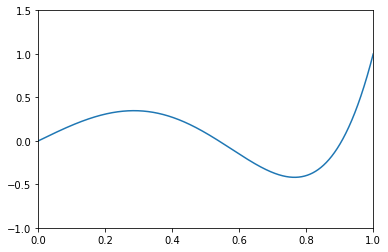

In [2]:
#redefine everything
vymin=1.500   
vymax=2.500 
maxiter=100
h=1.e-4
x=0.
def f(t, y):
    '''
    Legendre polynomial function
    '''
    f=np.zeros(2)
    n=5
    f[0]=y[1]    #dy/dx
    f[1]=(1/(1-x*x))*(2*x*y[1]-n*(n+1)*y[0])
    return f

def rk4(t, h, y, n):
    '''
    Runge-Kutta method for integration
    '''
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

#Bisection method
for iter in range(maxiter):
    xp=[]
    yp=[]
    vy=(vymin+vymax)/2.
    y=[0.,vy]
    x=0
    print(iter)
    while(x<xend-h):
        '''
        need to add -h to be sure we don't run into a singularity from 1/1-1
        '''
        y = rk4(x,h,y,2)
        xp=np.append(xp,x)
        yp=np.append(yp,y[0])        
        x = x+h
    if(np.abs(y[0]-targety)<.01):
        '''
        This is when we have correct solution
        '''
        break
    #below are the conditions to know which way to change the velocity
    if y[0]<targety:
        vymin=vy
    else:
        vymax=vy
        
    print("iter ",iter, "vy",vy," shoot point, target",y[0],targety)
 
print("vy",vy)
plt.show()
plt.xlim(0.,1.0)
plt.ylim(-1.0,1.5)
plt.plot(xp,yp)
plt.show()